# Logistic Regression Using Newton's Method

-> Newton's method is a root finding method.

-> During Gradient Descent we got the loss function. Idealy we would have done that we would have minimized it like    in the linear regression and then would have got the value of theta, but here the loss function is not linear thus we cannot do that.

-> Rather we apply newton's method on the first derivative of loss function to find its minima/maxima.

$$
Gradient = A.T(h(wt.x) - y) where A =[[x11 ---x1d], [x21 --- x2d], -- ]
$$
$$
Hessian  = (A.T).B.A  where  B = diag( ∑ (w.T.x)(1-w.T.x))
$$

$$
Θ = Θ - α H^-1*Gradient
$$

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
class LogisticRegressionUsinfNewtonMethod:
    def __init__(self, theta=None, step_size=0.01, max_iter=10000, eps=1e-5):
        self.theta = theta
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
    
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x, y):
        probability = self._sigmoid(x.dot(self.theta))
        gradient = x.T.dot(probability - y)/len(y)
        return gradient
    
    def hessian(self, x, y):
        m, _ = x.shape
        probs = self._sigmoid(x.dot(self.theta))
        diag = np.diag(probs * (1. - probs))
        hess = 1 / m * x.T.dot(diag).dot(x)
        return hess  
     
    def _loss(self, x, y):
        """Get the empirical loss for logistic regression."""
        hx = self._sigmoid(x.dot(self.theta))
        loss = -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))
        return loss 
      
    def predict(self, x):
        y_predict = self._sigmoid(x.dot(self.theta))
        return y_predict 

    
    def fit(self, x, y):
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)

        for i in range(self.max_iter):
            grad = self.gradient(x, y)
            hess = self.hessian(x,y)

            prev_theta = np.copy(self.theta)
            self.theta -= self.step_size * np.linalg.inv(hess).dot(grad)

            loss = self._loss(x, y)
            
            print('[iter: {:02d}, loss: {:.7f}]'.format(i, loss))

            if np.sum(np.abs(prev_theta - self.theta)) < self.eps:
                print('Final theta (logreg): {}'.format(self.theta))
                return self.theta
                break

        
        print('Final theta (logreg): {}'.format(self.theta))
        return self.theta  
        



In [30]:
train_path = "ds1_test.csv"

train_data = pd.read_csv(train_path)
train_data.head()

X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

# Add a bias term to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [31]:
model = LogisticRegressionUsinfNewtonMethod()
coffecients = model.fit(X,y)

[iter: 00, loss: 0.6889475]
[iter: 01, loss: 0.6848308]
[iter: 02, loss: 0.6807948]
[iter: 03, loss: 0.6768367]
[iter: 04, loss: 0.6729545]
[iter: 05, loss: 0.6691457]
[iter: 06, loss: 0.6654083]
[iter: 07, loss: 0.6617402]
[iter: 08, loss: 0.6581394]
[iter: 09, loss: 0.6546040]
[iter: 10, loss: 0.6511323]
[iter: 11, loss: 0.6477224]
[iter: 12, loss: 0.6443728]
[iter: 13, loss: 0.6410817]
[iter: 14, loss: 0.6378478]
[iter: 15, loss: 0.6346694]
[iter: 16, loss: 0.6315452]
[iter: 17, loss: 0.6284738]
[iter: 18, loss: 0.6254539]
[iter: 19, loss: 0.6224841]
[iter: 20, loss: 0.6195634]
[iter: 21, loss: 0.6166904]
[iter: 22, loss: 0.6138641]
[iter: 23, loss: 0.6110834]
[iter: 24, loss: 0.6083472]
[iter: 25, loss: 0.6056544]
[iter: 26, loss: 0.6030041]
[iter: 27, loss: 0.6003954]
[iter: 28, loss: 0.5978273]
[iter: 29, loss: 0.5952989]
[iter: 30, loss: 0.5928093]
[iter: 31, loss: 0.5903578]
[iter: 32, loss: 0.5879435]
[iter: 33, loss: 0.5855657]
[iter: 34, loss: 0.5832235]
[iter: 35, loss: 0.5

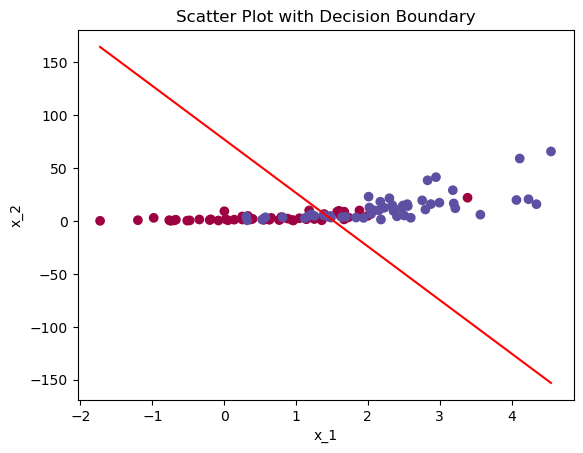

In [32]:
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
plt.xlabel("x_1")
plt.ylabel("x_2")

# Plot the decision boundary (line) using the optimized theta
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(coffecients[0] + coffecients[1] * x_boundary) / coffecients[2]
plt.plot(x_boundary, y_boundary, color="red")

plt.title("Scatter Plot with Decision Boundary")
plt.show()

In [33]:
testData = pd.read_csv('ds1_test.csv')
X_Test = testData.iloc[:, :-1].values
y_test = testData.iloc[:, -1].values

X_Test = np.hstack((np.ones((X_Test.shape[0], 1)), X_Test))
y_predict = model.predict(X_Test)


yhat = y_predict > 0.5
print('LR Accuracy: %.2f' % np.mean( (yhat == 1) == (y_predict == 1)))

LR Accuracy: 0.50
